Gerard Soteras Garriga i Ferran Murcia Rull



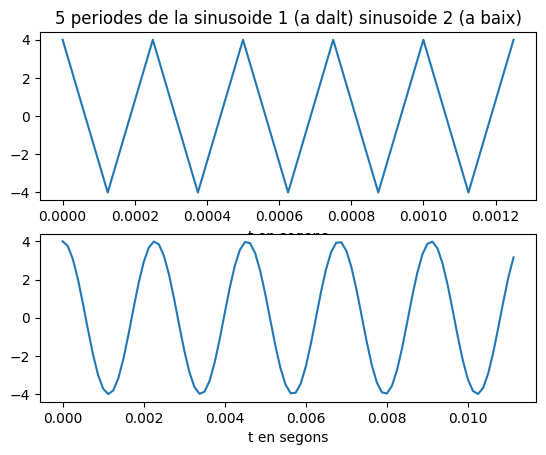

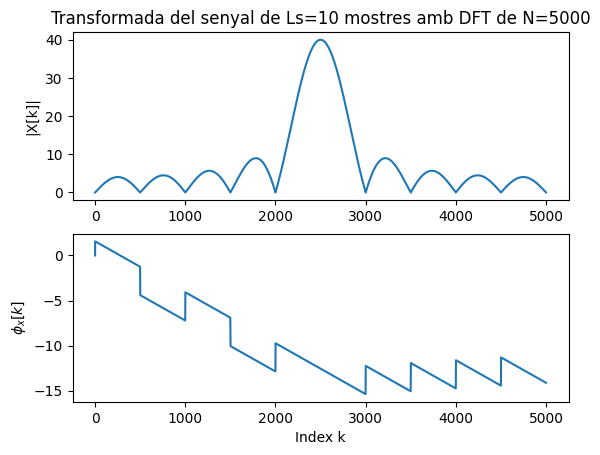

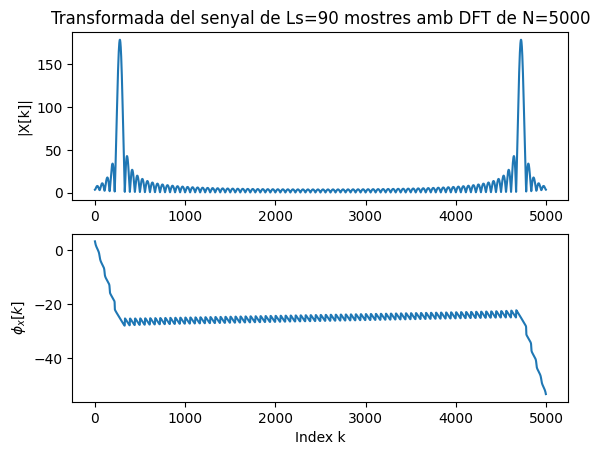

In [53]:
##Exercisi 1 
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

T= 2.5                               # Durada de T segons
fm=8000                              # Freqüència de mostratge en Hz (l'ampliem per deixar marge al mostrejar una frequencia de 4khz)
fx1=4000                            # Freqüència de la sinusoide 1
fx2 = 440                           # Freqüència de la sinusoide 2
A=4                                  # Amplitud de la sinusoide
pi=np.pi                             # Valor del número pi
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm=1/fm                              # Període de mostratge
t=Tm*np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
x1 = A * np.cos(2 * pi * fx1 * t)      # Senyal sinusoidal1
x2 = A * np.cos(2 * pi * fx2 * t)    # Senyal sinusoidal2
sf.write('so_exemple_4khz.wav', x, fm)   # Escriptura del senyal a un fitxer en format wav sin1
sf.write('so_exemple_440hz.wav', x, fm)    # Escriptura del senyal a un fitxer en format wav sin2
Tx1=1/fx1                                   # Període del senyal1
Tx2=1/fx2                                   # Període del senyal2
Ls1=int(fm*5*Tx1)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide
Ls2=int(fm*5*Tx2)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide
plt.figure(0)                             # Nova figura
plt.subplot(211)
plt.plot(t[0:Ls1+1], x1[0:Ls1+1])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide 1 (a dalt) sinusoide 2 (a baix)')   # Títol del gràfic
plt.subplot(212)
plt.plot(t[0:Ls2], x2[0:Ls2])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal

plt.show()                                # Visualització de l'objecte gràfic. 

import sounddevice as sd      # Importem el mòdul sounddevice per accedir a la tarja de so
sd.play(x2, fm)                # Reproducció d'àudio (la 440hz)
### Domini transformat
from numpy.fft import fft     # Importem la funció fft
N=5000                        # Dimensió de la transformada discreta
X1=fft(x1[0 : Ls1], N)           # Càlcul de la transformada de 5 períodes de la sinusoide
X2=fft(x2[0 : Ls2], N)           # Càlcul de la transformada de 5 períodes de la sinusoide
k1=np.arange(N)                        # Vector amb els valors 0≤  k<N
k2=np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(k1,abs(X1))                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls1} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k1,np.unwrap(np.angle(X1)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics

plt.figure(2)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(k2,abs(X2))                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls2} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k2,np.unwrap(np.angle(X2)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()   




## Exercici  1
### Comentar resultats:

Hem modificat la freqüència del senyal 1 perquè sigui 4khz i hem creat una nova sinusoide de 440hz. Hem calculat les respectives fft. Com podem veure a la primera gràfica, ens mostra 5 períodes dels dos senyals sinusoidals. En la primera sinusoide l'eix d'abscisses en 5 períodes va del 0 als 0,001 s i a la segona del 0 al 0,01.

A causa de la freqüència de mostratge escollida podem observar que la primera sinusoide a tenir una elevada freqüència en representar-la sembla més aviat un senyal triangular.

A les respectives fft's veiem un pic a k=2500 que és correspon amb f0 = 4khz (k/N = f0/fm) i a la segona veiem un pic a k = 275 i a k = 4725 que és la repetició simètrica de la freqüència fonamental.


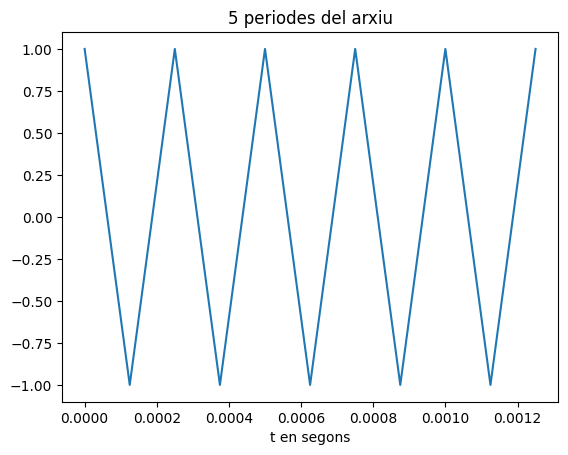

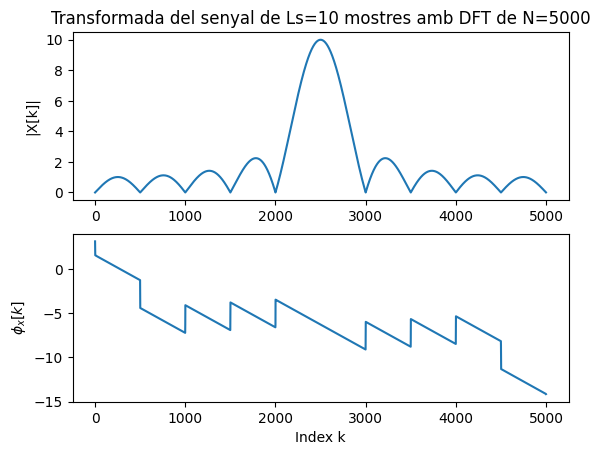

In [52]:
##Exercisi 2 
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_r, fm = sf.read('so_exemple_4khz.wav')
T= 2.5                               # Durada de T segons
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm=1/fm                              # Període del senyal
t=Tm*np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
fx = 4000
Tx=1/fx
Ls=int(fm*5*Tx)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide
plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls+1], x_r[0:Ls+1])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes del arxiu')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic. 

import sounddevice as sd      # Importem el mòdul sounddevice per accedir a la tarja de so
sd.play(x_r, fm)                # Reproducció d'àudio (la 440hz)
### Domini transformat
from numpy.fft import fft     # Importem la funció fft
N=5000                        # Dimensió de la transformada discreta
X=fft(x_r[0 : Ls], N)           # Càlcul de la transformada de 5 períodes de la sinusoide
k=np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(k,abs(X))                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics

## Exercici 2
### Comentar resultats:

Com podem observar, en aquesta nova imatge hem utilitzat el anterior fitxer 'exemple_4kHz' i l'hem carregat i llegit per a aquest nou exercici. Hem hagut de modificar/ajustar la fx a 4kHz i la Tx per a obtenir el número de mostres corresponents per a aquesta nova figura.

La gràfica de la sinusoide i de la seva nova transformada és la mateixa que hem obtingut per a l'exercici anterior, ja que és l'arxiu que simplement hem llegit a l'exercici anterior.

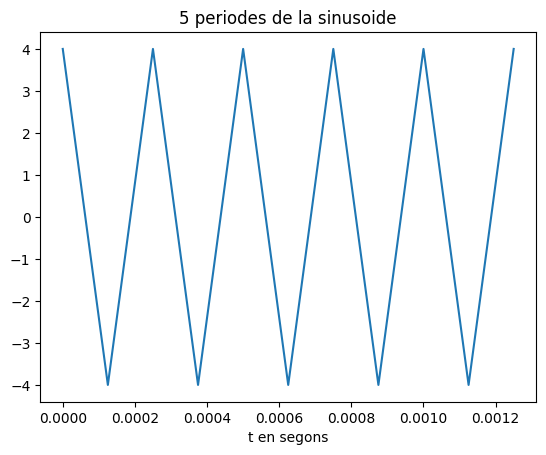

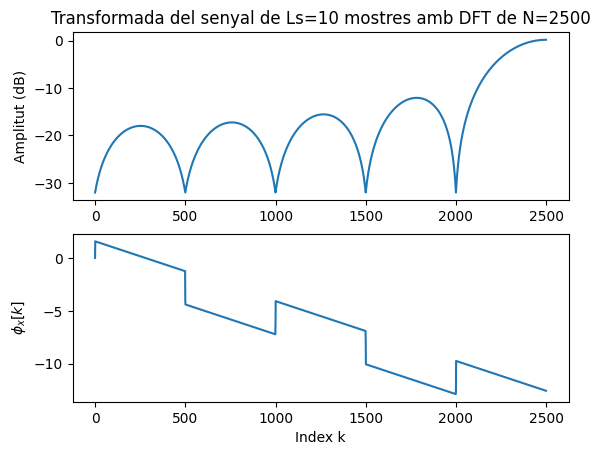

In [97]:
## Exercisi 3 
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

T= 2.5                               # Durada de T segons
fm=8000                              # Freqüència de mostratge en Hz (l'ampliem per deixar marge al mostrejar una frequencia de 4khz)
fx1=4000                            # Freqüència de la sinusoide 1
A=4                                  # Amplitud de la sinusoide
pi=np.pi                             # Valor del número pi
L = int(fm * T)                      # Nombre de mostres del senyal digital
Tm=1/fm                              # Període de mostratge
t=Tm*np.arange(L)                    # Vector amb els valors de la variable temporal, de 0 a T
x1 = A * np.cos(2 * pi * fx1 * t)      # Senyal sinusoidal1
Tx1=1/fx1                                   # Període del senyal1
Ls1=int(fm*5*Tx1)                           # Nombre de mostres corresponents a 5 períodes de la sinusoide
plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls1+1], x1[0:Ls1+1])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic. 

import sounddevice as sd      # Importem el mòdul sounddevice per accedir a la tarja de so
### Domini transformat
from numpy.fft import fft     # Importem la funció fft
N=5000                        # Dimensió de la transformada discreta
n = int(N/2)
X1=fft(x1[0 : Ls1], N)           # Càlcul de la transformada de 5 períodes de la sinusoide
k1=np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
X1_db = 20 * np.log10((abs(X1)+1)/max(abs(X1)))
plt.plot(k1[: n], (X1_db[: n]), label = '4khz')                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls1} mostres amb DFT de N={n}')   # Etiqueta del títol
plt.ylabel('Amplitut (dB)')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k1[: n],np.unwrap(np.angle(X1[: n])))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics 


## Exercici 3
### Comentar resultats:

Hem hagut de canviar l'escala de representació agafant la meitat de número de mostres, calcula en db utilitzant la fòrmula donada evitant la divisó entre 0 sumant 1 al valor de la transformada després de fer el valor absolut.

Com podem veure en la ilustració de la transformada, tenim un pic a l'index de la k de 2500 el qual com em demostrat abans es correspont amb la freqüència de 4000 Hz. La fase correspont és la mateixa que teniem abans pero dividit entre 2.

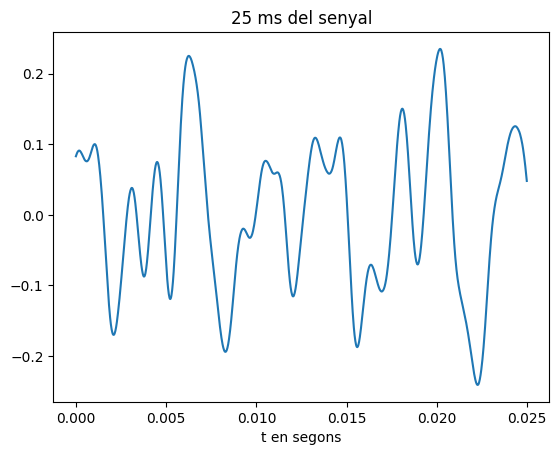

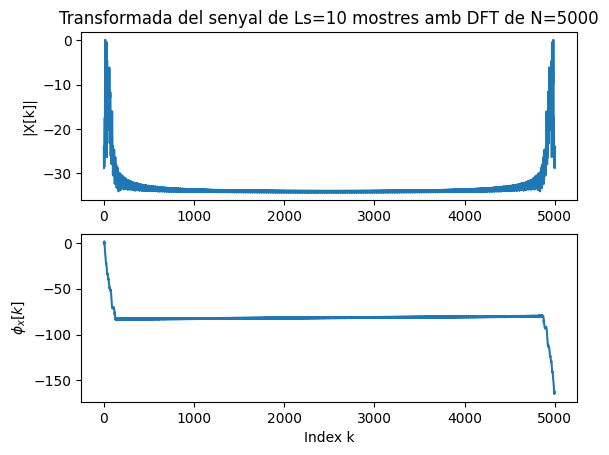

fm = 48000
Nombre de mostres del senyal =  207026
k maximes sono k1 = 16 i k2 = 4984 (reflexe de la primera)
Frequencies fonamentals = 153 i 47846 (que es el reflexe de la primera)


In [144]:
##Exercisi 4 
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_r, fm = sf.read('Canso.wav')
L = len(x_r)                      # Nombre de mostres del senyal digital
T= L/fm                            # Durada de T segons
Tm=1/fm                              # Període del senyal
t=Tm*np.arange(L)                   # Vector amb els valors de la variable temporal, de 0 a T
ls = int(fm * 0.025)                       
plt.figure(0)                             # Nova figura
plt.plot(t[0:ls], x_r[0:ls])                # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('25 ms del senyal')   # Títol del gràfic
plt.show()                                # Visualització de l'objecte gràfic. 

import sounddevice as sd      # Importem el mòdul sounddevice per accedir a la tarja de so
sd.play(x_r, fm)                # Reproducció d'àudio
### Domini transformat
from numpy.fft import fft     # Importem la funció fft
N=5000                        # Dimensió de la transformada discreta
X=fft(x_r[0 : ls], N)           # Càlcul de la transformada
k=np.arange(N)                        # Vector amb els valors 0≤  k<N

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
X_db = 20 * np.log10((abs(X)+1)/max(abs(X)))
plt.plot(k,X_db)                    # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[k]|')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Index k')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[k]$')             # Etiqueta de la fase en Latex
plt.show()                            # Per mostrar els grafics

p_max = np.argmax(X_db)
f0 = (p_max/N) * fm
X_db[p_max] = 0
p_max2 = np.argmax(X_db)
f02 = (p_max2/N) * fm
print('fm =', fm)
print('Nombre de mostres del senyal = ', L)
print('k maximes sono k1 = %d i k2 = %d (reflexe de la primera)' % (p_max, p_max2))
print('Frequencies fonamentals = %d i %d (que es el reflexe de la primera)' % (f0, f02))
